In [39]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import re


In [ ]:

# Import data 
Train_data= pd.read_csv('titanic/train.csv')
df_test= pd.read_csv('titanic/test.csv')
df_gender_submission= pd.read_csv('titanic/gender_submission.csv')
# Print first few rows
Train_data

# Check missing data percentage
print("Missing value percentages by variable")
Train_data.isnull().mean().round(4).mul(100).sort_values(ascending=False)

In [12]:
# Check data types
Train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [13]:
# check the unique values count
print("Number of unique values in each columns")
for col in Train_data.columns:
    print(str(col)+ "   " + str(Train_data[col].nunique()))



Number of unique values in each columns
PassengerId   891
Survived   2
Pclass   3
Name   891
Sex   2
Age   88
SibSp   7
Parch   7
Ticket   681
Fare   248
Cabin   147
Embarked   3


In [14]:
# dropping unimportant columns
#Train_data.drop('Name',axis=1)
#Train_data.drop('Ticket',axis=1)
#Train_data.drop('PassengerId',axis=1)
#Train_data.drop('Cabin',axis=1)
#Train_data.drop('Embarked',axis=1)
Train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [15]:
# Print column names
list(Train_data.columns)
Train_data[['Age']] = Train_data[['Age']].fillna(value=Train_data.mean(skipna=True, numeric_only=True))
Train_data[['Age']] = Train_data[['Age']].round()

In [16]:
# Replace missing values with mode of the Embarked column
#Train_data['Embarked'] = Train_data['Embarked'].fillna(Train_data['Embarked'].mode()[0])
#Train_data.isnull().mean().round(4).mul(100).sort_values(ascending=False)

# OR can drop the missing rows
Train_data = Train_data.drop(Train_data.loc[Train_data.get("Embarked").isna()].index)
# See if there is still any missing data in train dataset
print("Missing values remaining in the data set")
Train_data.isna().sum().max()

Missing values remaining in the data set


687

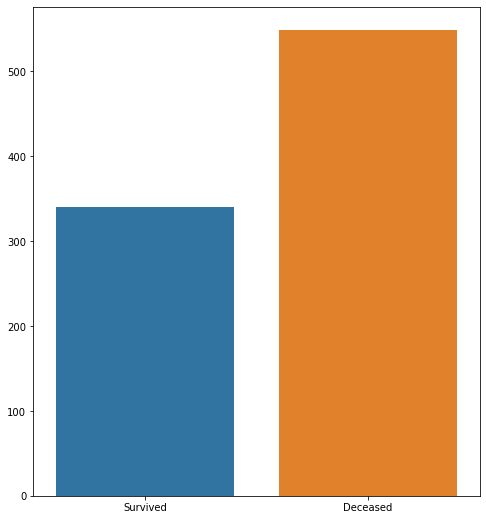

In [17]:
plt.figure(figsize=(8, 9))
survival_labels = ["Survived", "Deceased"]
survival_counts = [Train_data.Survived.value_counts()[1], Train_data.Survived.value_counts()[0]]
sns.barplot(x= survival_labels, y = survival_counts)
plt.show()

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

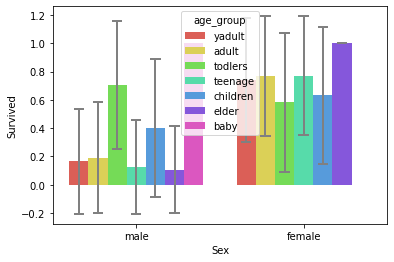

In [18]:
Train_data.loc[Train_data['Age'] <= 1, 'age_group'] = 'baby'
Train_data.loc[Train_data['Age'].between(1,3), 'age_group'] = 'todlers'
Train_data.loc[Train_data['Age'].between(4,10), 'age_group'] = 'children'
Train_data.loc[Train_data['Age'].between(11,19), 'age_group'] = 'teenage'
Train_data.loc[Train_data['Age'].between(20,35), 'age_group'] = 'yadult'
Train_data.loc[Train_data['Age'].between(36,60), 'age_group'] = 'adult'
Train_data.loc[Train_data['Age']>60, 'age_group'] = 'elder'

# create plot
sns.barplot(x = 'Sex', y = 'Survived',  hue = 'age_group',data = Train_data,
            palette = 'hls',
            order = ['male', 'female'],  
            capsize = 0.05,             
            saturation = 8,             
            errcolor = 'gray', errwidth = 2,  
            ci = 'sd'   
            )


In [19]:
Train_data.loc[Train_data['Age'].round() <= 10, 'mean_age'] = 5
Train_data.loc[Train_data['Age'].round().between(11,20), 'mean_age'] = 15
Train_data.loc[Train_data['Age'].round().between(21,30), 'mean_age'] = 25
Train_data.loc[Train_data['Age'].round().between(31,40), 'mean_age'] = 35
Train_data.loc[Train_data['Age'].round().between(41,50), 'mean_age'] = 45
Train_data.loc[Train_data['Age'].round().between(51,60), 'mean_age'] = 55
Train_data.loc[Train_data['Age'].round().between(61,70), 'mean_age'] = 65
Train_data.loc[Train_data['Age'].round().between(71,80), 'mean_age'] = 75
Train_data.loc[Train_data['Age'] > 80, 'mean_age'] = 85
Train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_group,mean_age
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,yadult,25.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,adult,35.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,yadult,25.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,yadult,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,yadult,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,yadult,25.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,teenage,15.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.0,1,2,W./C. 6607,23.4500,NaN,S,yadult,25.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,yadult,25.0


In [20]:
Train_data['Age'].unique()
# Check missing data percentage
Train_data.isnull()
Train_data.isnull().mean().round(4).mul(100).sort_values(ascending=False)

Cabin          77.28
PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age             0.00
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Embarked        0.00
age_group       0.00
mean_age        0.00
dtype: float64

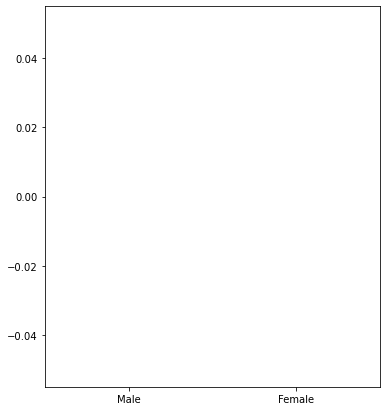

It is clear from the graph that there are more servival rate in females than males
Therefore, sex is identified as a good variable for classification


In [21]:
gender_labels = ["Male", "Female"]
gender_survival_counts = [len(Train_data[(Train_data.Survived == 1) & (Train_data.Sex == 1)]), len(Train_data[(Train_data.Survived == 1) & (Train_data.Sex == 0)])]
plt.figure(figsize=(6, 7))
sns.barplot(x = gender_labels, y = gender_survival_counts)
plt.show()
print('''It is clear from the graph that there are more servival rate in females than males
Therefore, sex is identified as a good variable for classification''')

It is clear from the graph that there are more servival rate in first class than second class
Similarly, there are more servival rate in second class  than third class
Therefore, pasenger class is a good variable for classification


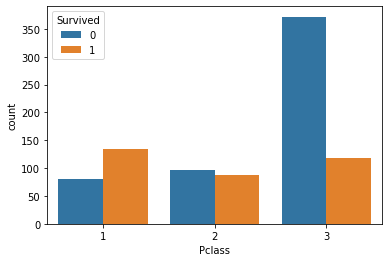

In [22]:
sns.countplot(x=Train_data['Pclass'], hue=Train_data['Survived'])
print('''It is clear from the graph that there are more servival rate in first class than second class
Similarly, there are more servival rate in second class  than third class
Therefore, pasenger class is a good variable for classification''')

In [23]:
# Check if there is data variation between passenger class and servival
Train_data['Survived'].groupby(Train_data['Pclass']).mean()

Pclass
1    0.626168
2    0.472826
3    0.242363
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Name_Title', ylabel='count'>

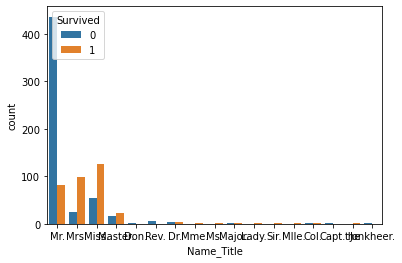

In [24]:
Train_data['Name_Title'] = Train_data['Name'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.split()[0])

Train_data['Name_Title'].value_counts()
sns.countplot(x=Train_data['Name_Title'], hue=Train_data['Survived'])

In [25]:
train_rf = Train_data

train_rf['Survived'] = train_rf['Survived'].astype(object)
train_rf['Pclass'] = train_rf['Pclass'].astype(object)
train_rf['Sex'] = train_rf['Sex'].astype(object)
train_rf.loc[train_rf['Age'] <= 1, 'age_group'] = 'baby'
train_rf.loc[train_rf['Age'].between(1,3), 'age_group'] = 'todlers'
train_rf.loc[train_rf['Age'].between(4,10), 'age_group'] = 'children'
train_rf.loc[train_rf['Age'].between(11,19), 'age_group'] = 'teenage'
train_rf.loc[train_rf['Age'].between(20,35), 'age_group'] = 'yadult'
train_rf.loc[train_rf['Age'].between(36,60), 'age_group'] = 'adult'
train_rf.loc[train_rf['Age']>60, 'age_group'] = 'elder'
train_rf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    object 
 2   Pclass       889 non-null    object 
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     889 non-null    object 
 12  age_group    889 non-null    object 
 13  mean_age     889 non-null    float64
 14  Name_Title   889 non-null    object 
dtypes: float64(3), int64(3), object(9)
memory usage: 143.4+ KB


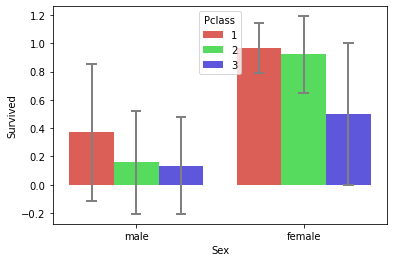

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_group,mean_age,Name_Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,yadult,25.0,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,adult,35.0,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,yadult,25.0,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,yadult,35.0,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,yadult,35.0,Mr.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,yadult,25.0,Rev.
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,teenage,15.0,Miss.
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.0,1,2,W./C. 6607,23.4500,NaN,S,yadult,25.0,Miss.
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,yadult,25.0,Mr.


In [26]:
# create plot
sns.barplot(x = 'Sex', y = 'Survived', hue = 'Pclass', data = Train_data,
            palette = 'hls',
            order = ['male', 'female'],  
            capsize = 0.05,             
            saturation = 8,             
            errcolor = 'gray', errwidth = 2,  
            ci = 'sd')


plt.show()
Train_data

In [27]:
'''from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=700,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
rf.fit(train.iloc[:, 1:], train.iloc[:, 0])
print("%.4f" % rf.oob_score_)'''

'from sklearn.ensemble import RandomForestClassifier\n\nrf = RandomForestClassifier(criterion=\'gini\', \n                             n_estimators=700,\n                             min_samples_split=10,\n                             min_samples_leaf=1,\n                             max_features=\'auto\',\n                             oob_score=True,\n                             random_state=1,\n                             n_jobs=-1)\nrf.fit(train.iloc[:, 1:], train.iloc[:, 0])\nprint("%.4f" % rf.oob_score_)'

The data can be converted to numeric type inorder to use algorithms that use only numeric variables

In [28]:
Train_data_numeric = Train_data
# Convert sex variable to numeric values
Train_data_numeric['Sex'] = Train_data_numeric['Sex'].replace(['female','male'],[0,1])
Train_data_numeric

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_group,mean_age,Name_Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,yadult,25.0,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,adult,35.0,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,yadult,25.0,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,yadult,35.0,Mrs.
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,yadult,35.0,Mr.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S,yadult,25.0,Rev.
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S,teenage,15.0,Miss.
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,30.0,1,2,W./C. 6607,23.4500,NaN,S,yadult,25.0,Miss.
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C,yadult,25.0,Mr.


Family class with parent and children

SibSp: number of siblings/spouse

Parch: number of childre/parents

With the number of siblings or spouse and the number of children or parents we can create new class called Family.

In [37]:
# Get pasengers who travel with family (either siblings,spouse, childre or parents)
# Get the rows which has values for either SibSp column or Parch
Train_data_families = Train_data.loc[(Train_data['SibSp'] > 0) | (Train_data['Parch'] > 0)]
Train_data_families

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_group,mean_age,Name_Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,yadult,25.0,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,adult,35.0,Mrs.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,yadult,35.0,Mrs.
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,S,todlers,5.0,Master.
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,S,yadult,25.0,Mrs.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",0,28.0,1,0,P/PP 3381,24.0000,NaN,C,yadult,25.0,Mrs.
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",0,56.0,0,1,11767,83.1583,C50,C,adult,55.0,Mrs.
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",0,25.0,0,1,230433,26.0000,NaN,S,yadult,25.0,Mrs.
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",0,39.0,0,5,382652,29.1250,NaN,Q,adult,35.0,Mrs.


In [30]:
def extract_last_name(x):
    # String x will split by ',' and take the first element in the resulting list. 
    # Then any whitespaces at the front and end of the first element will be truncated and returned
    return x.split(",")[0].strip() 


In [38]:
Train_data_families["LastName"] = Train_data_families["Name"].apply(extract_last_name)
Train_data_families.to_csv('family.csv')
list_of_n_members = Train_data_families.groupby(['LastName']).size()
# List of family names to identify members of one family
lastname_list = list(Train_data_families["LastName"].unique())
print(lastname_list[4])


Johnson


/var/folders/vj/796j6ms967z0rkptghjx57zm0000gn/T/ipykernel_63981/2103876075.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train_data_families["LastName"] = Train_data_families["Name"].apply(extract_last_name)


In [44]:
#Sometimes tickets of passengers traveling together differ in their last digit, removing the last digit of the Ticket. 

Train_data_families["Ticket"] = Train_data_families["Ticket"].apply(lambda x: re.sub('.$','X',x))
Train_data_families

/var/folders/vj/796j6ms967z0rkptghjx57zm0000gn/T/ipykernel_63981/2652863144.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train_data_families["Ticket"] = Train_data_families["Ticket"].apply(lambda x: re.sub('.$','X',x))


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_group,mean_age,Name_Title,LastName
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 2117X,7.2500,NaN,S,yadult,25.0,Mr.,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 1759X,71.2833,C85,C,adult,35.0,Mrs.,Cumings
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,11380X,53.1000,C123,S,yadult,35.0,Mrs.,Futrelle
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,34990X,21.0750,NaN,S,todlers,5.0,Master.,Palsson
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,34774X,11.1333,NaN,S,yadult,25.0,Mrs.,Johnson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",0,28.0,1,0,P/PP 338X,24.0000,NaN,C,yadult,25.0,Mrs.,Abelson
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",0,56.0,0,1,1176X,83.1583,C50,C,adult,55.0,Mrs.,Potter
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",0,25.0,0,1,23043X,26.0000,NaN,S,yadult,25.0,Mrs.,Shelley
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",0,39.0,0,5,38265X,29.1250,NaN,Q,adult,35.0,Mrs.,Rice


Noticed that when only last names are match to group families, there can be different families with same last names.
Therefore, the ticket number also used to identify families traveling together

In [66]:
class Person:
    def __init__(self, last_name, ticket, full_name, survival):
        self.last_name = last_name
        self.ticket = ticket
        self.full_name = full_name
        self.survival = survival

In [68]:
with_family_list = list(zip(Train_data_families["Survived"], Train_data_families["Pclass"], Train_data_families["Name"], Train_data_families["Sex"],
Train_data_families["Age"], Train_data_families["SibSp"], Train_data_families["Parch"], Train_data_families["Ticket"], Train_data_families["LastName"]))
list_of_pasengers = []
#print (tuples)
for item in with_family_list:
    p = Person(item[8], item[7], item[2], item[1])
    list_of_pasengers.append(p)

# Just a test
print(list_of_pasengers[1].last_name)
print(list_of_pasengers[10].last_name)


Cumings
Palsson


In [69]:
print(len(list_of_pasengers))

354


In [75]:
families_dict = {}
for p in list_of_pasengers:
    key = f'{p.last_name}_{p.ticket}'
    if (key in families_dict):
        families_dict[key].append(p)
    else:    
        families_dict[key] = [p]


In [77]:
print(f'Number of members traveled with family is {len(families_dict)}')


Number of members traveled with family is 196


In [61]:
for value in families_dict.values():


Braund_A/5 2117X
Cumings_PC 1759X
Futrelle_11380X
Palsson_34990X
Johnson_34774X
Nasser_23773X
Sandstrom_PP 954X
Andersson_34708X
Rice_38265X
Vander Planke_34576X
Asplund_34707X
Fortune_1995X
Spencer_PC 1756X
Meyer_PC 1760X
Holverson_11378X
Nicola-Yarred_265X
Ahlin_754X
Turpin_1166X
Laroche_SC/Paris 212X
Lennon_37037X
Samaan_266X
Arnold-Franchi_34923X
Panula_310129X
Harper_PC 1757X
Faunthorpe_292X
Ostby_11350X
West_C.A. 3465X
Goodwin_CA 214X
Harris_3697X
Skoog_34708X
Moubarek_266X
Andersson_310128X
Kink_31515X
Chronopoulos_268X
Caldwell_24873X
Backstrom_310127X
Ford_W./C. 660X
Chaffee_W.E.P. 573X
Dean_C.A. 231X
Greenfield_PC 1775X
Doling_23191X
Kantor_24436X
White_3528X
Gustafsson_310127X
Moran_37111X
Zabour_266X
Jussila_413X
Baxter_PC 1755X
Hickman_S.O.C. 1487X
Peter_266X
Robins_A/5. 333X
Weisz_22841X
Newsom_1175X
Boulos_267X
Hakkarainen_STON/O2. 310127X
Nicholls_C.A. 3311X
Navratil_23008X
Pears_11377X
van Billiard_A/5. 85X
Williams_PC 1759X
Sage_CA. 234X
Cribb_37136X
Goldsmith_36329X
